In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
import math

In [2]:
# mendefinisikan bentuk persegi 4x4
a, b, c, d = (2, 2, 1), (2, -2, 1), (-2, -2, 1), (-2, 2, 1)
A = np.array([a, b, c, d])

In [3]:
def translasi2D (mat,tx,ty):
    '''
    mat = matriks input
    dimana  ˜x = (x, y, w) = ˜w(x, y, 1)
    tx = besar translasi pada sumbu x
    ty = besar translasi pada sumbu y
    '''
    
    # 2d translasi dapat ditulis dengan
    # x' = x + tx
    # y' = y + ty 
    # [[x'],[y']] = [[x + tx],[y + ty]]
    
    # atau dalam koordinat homogen
    # x' = [I,t]x
    # dimana I = identitas dan x = vektor
    # x' = [[1, 0, tx],[0, 1, ty]]x
    # untuk dimungkinkannya transformasi menggunakan perkalian matriks
    # maka menggunakan matriks 3x3 
    # (didapat dari matriks 2x3 dengan menambahkan baris [0, 0, 1])
    # sehingga matriksnya
    # [x', y', 1] = [[1, 0, tx],[0, 1, ty], [0, 0, 1]] @ [x, y, 1]
    
    translasi = np.array([[1, 0, tx], 
                          [0, 1, ty], 
                          [0, 0, 1]])
    
    rowInput,colInput = mat.shape
    
    hasil = np.array([])
    
    for row in mat:
        output_row = translasi@row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(rowInput,colInput))

In [4]:
def dilatasi2D (mat,k):
    '''
    mat = matriks input
    dimana  ˜x = (x, y, w) = ˜w(x, y, 1)
    k = besar skala
    '''
    
    # dilatasi
    # x' = kx
    # y' = ky
    # [[x'],[y']] = k[[x],[y]]
    
    dilatasi = np.array([[k, 0, 0], 
                         [0, k, 0], 
                         [0, 0, 1]])

    rowInput,colInput = mat.shape
    
    hasil = np.array([])
    
    for row in mat:
        output_row = dilatasi @ row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(rowInput,colInput))

In [45]:
def rotasi2D (mat,theta):
    '''
    mat = matriks input
    dimana  ˜x = (x, y, w) = ˜w(x, y, 1)
    theta = besar sudut rotasi dalam satuan radian
    '''
    
    # rotasi
    # x' = xcostheta) - ysin(theta)
    # y' = xsin(theta) + ycos(theta)
    
    sin = (math.sin(theta))
    cos = (math.cos(theta))
    rotasi = np.array([[cos, -sin, 0], 
                       [sin, cos, 0], 
                       [0, 0, 1]])

    rowInput,colInput = mat.shape
    
    hasil = np.array([])
    
    for row in mat:
        output_row = rotasi @ row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(rowInput,colInput))

In [6]:
# rotasi + translasi 
# transformasi ini juga dikenal sebagai 2d euclidean transformation
# dapat ditulis dengan 
# x' = Rx + t 
# dimana R = [[cos(theta), -sin(theta)],[sin(theta), cos(theta)]]
# maka 
# x' = (xcostheta) - ysin(theta)) + tx
# y' = (xsin(theta) + ycos(theta)) + ty
#
# matriks rotasi + translasi untuk koordinat homegenous (x,y,1)
# matriks = [[cos, -sin, tx],
#            [sin, cos, ty], 
#            [0  , 0  , 1]]

# dilatasi + rotasi + translasi
# transformasi ini juga dikenal dengan similarity transform
# x' = sRx + tx
# y' = sRy + ty
# dimana s adalah faktor skala
# x' = s(xcos(theta) - ysin(theta)) + tx 
# y' = s(xsin(theta) + ycos(theta)) + ty 
# matrix = [[s.cos, -s.sin, tx],
#           [s.sin, s.cos  , ty],
#           [0    , 0    , 1]]

In [28]:
def affine2D (mat,
              dilatasi = 1.,
              translasi = (0.,0.),
              rotasi = 0.):
    
    tx,ty = translasi
    s = dilatasi
    theta = rotasi
    sin = (math.sin(theta))
    cos = (math.cos(theta))
    
    affineMat = np.array([
        [s*np.cos(theta), -s*np.sin(theta), tx],
        [s*np.sin(theta), s*np.cos(theta) , ty],
        [0              , 0               , 1 ]
    ])
    rowInput,colInput = mat.shape
    
    hasil = np.array([])
    
    for row in mat:
        output_row = affineMat @ row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(rowInput,colInput))

In [6]:
def draw_2D(mat):
    color_lut = 'rgbc'
    fig = plt.figure()
    ax = plt.gca()
    xs = []
    ys = []
    i = 0
    
    for row in mat:
        x, y, w = row
    
        xs.append(x)
        ys.append(y)
    
        i = int(i)
        c = color_lut[i]
        plt.scatter(x, y, color=c)
        plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
        i += 1
        
    xs.append(xs[0])
    ys.append(ys[0])
    plt.plot(xs, ys, color="maroon", linestyle='solid')
    ax.set_xticks(np.arange(-10, 10, 1))
    ax.set_yticks(np.arange(-4, 10, 1))
    plt.grid()
    plt.show()

In [51]:
awal = A
dl = dilatasi2D(awal,2)
rt = rotasi2D(awal,math.pi/6)
tl = translasi2D(awal,2,2)
af = affine2D(A,
              dilatasi=1,
              translasi=(0,0),
              rotasi=math.pi/6)

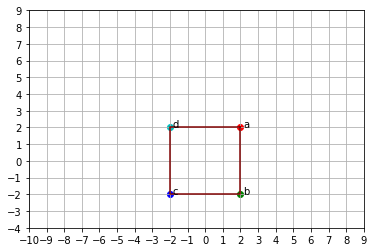

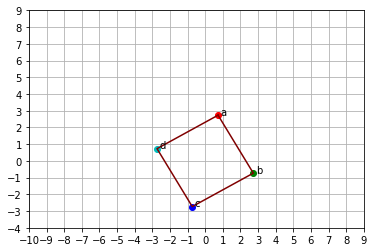

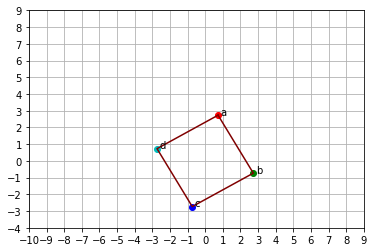

In [52]:
draw_2D(awal)
#draw_2D(tl)
draw_2D(rt)
draw_2D(af)

In [11]:
'''
translasi = 2 derajat kebebasan
skala/rotasi = 4 derajat kebebasan
affine = 6 derajat kebebasan
projective = 8 derajat kebebasan

Translasi adalah operasi satu titik, jadi setidaknya menggunakan satu titik
Rotasi dan skala setidaknya dua titik
Affine (atau similarity) setidaknya tiga titik
Projective Transformation setidaknya 4 titik

transformasi 2D itu matriks transformasi 3x3
projective transformation itu punya 8 dof
Kenapa bisa jadi matriks 3x3 dari 8 dof?
Satunya yang terakhir itu angka 1
residu dari matriks awalnya, yakni matriks identitas
8 dof itu 6 pertamanya juga sebenernya scaling, rotation, Dan translation
2 terakhir itulah yang mendefinisikan projection

pre_result = [[h00, h01, h02],
              [h10, h11, h12],
              [h20, h21, h22]] @ [x, y, 1]
              
              (3x3) @ (3x1) = (3x1) = (wx,wy,w)

karena baris ketiga juga dipakai dalam matriks projective maka hasil yang
didapat tidak langsung berupa koordinat melainkan [wx,wy,w]
yang mana titik tersebut bukan berada di dimensi 2 melainkan berada di dimensi 3
disinilah asal kata projeksi

untuk ke dimensi 2 maka titik tersebut kita bagi dengan w supaya menghasilkan
[x,y,1]

x' = (x*h00 + y*h01 + h02) / (x*h20 + y*h21 + h22)
y' = (x*h10 + y*h11 + h12) / (x*h20 + y*h21 + h22)
'''

'\ntranslasi = 2 derajat kebebasan\nskala/rotasi = 4 derajat kebebasan\naffine = 6 derajat kebebasan\nprojective = 8 derajat kebebasan\n\nTranslasi adalah operasi satu titik, jadi setidaknya menggunakan satu titik\nRotasi dan skala setidaknya dua titik\nAffine (atau similarity) setidaknya tiga titik\nProjective Transformation setidaknya 4 titik\n\nkarena baris ketiga juga dipakai dalam matriks projective maka hasil yang\ndidapat tidak langsung berupa koordinat melainkan [wx,wy,w]\nyang mana titik tersebut bukan berada di dimensi 2 melainkan berada di dimensi 3\ndisinilah asal kata projeksi\n\nuntuk ke dimensi 2 maka titik tersebut kita bagi dengan w supaya menghasilkan\n[x,y,1]\n\ntransformasi 2D itu matriks transformasi 3x3\nprojective transformation itu punya 8 dof\nKenapa bisa jadi matriks 3x3 dari 8 dof?\nSatunya yang terakhir itu angka 1\nresidu dari matriks awalnya, yakni matriks identitas\n8 dof itu 6 pertamanya juga sebenernya scaling, rotation, Dan translation\n2 terakhir itul

In [57]:
def projective2D(mat,v1,v2):
    projective_matrix = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [v1, v2, 1]])
    
    # mendapatkan ukuran matriks input
    baris,kolom = mat.shape
    
    hasil = np.array([])
    for row in A:
        # mat_w akan menghasilkan (wx,wy,w)
        mat_w = projective_matrix @ row
        # untuk menghasilkan (x,y,1) maka dibagi dengan w
        output_row = mat_w / mat_w[2]
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(baris,kolom))

In [58]:
print("matriks awal")
print(A)

print("matriks projeksi dari matriks sebelumnya")
pm = projective2D(A,0.1,0.025)

print(pm)

matriks awal
[[ 2  2  1]
 [ 2 -2  1]
 [-2 -2  1]
 [-2  2  1]]
matriks projeksi dari matriks sebelumnya
[[ 1.6         1.6         1.        ]
 [ 1.73913043 -1.73913043  1.        ]
 [-2.66666667 -2.66666667  1.        ]
 [-2.35294118  2.35294118  1.        ]]


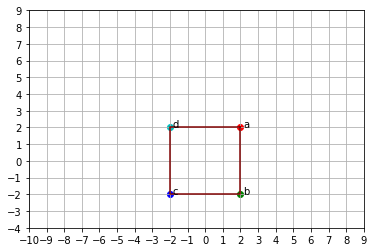

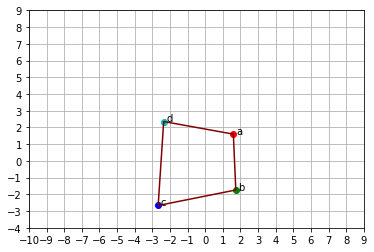

In [60]:
draw_2D(awal)
draw_2D(pm)